# `hodalpt.sims.quijote` demo 
Quick demonstration of the `quijote` module. The module assumes that the directory is structured as follows: 
```
QUIJOTE/
    fiducial/ 
        0/
            ICS/ 
            Halos/
        1/
        2/
        ...
    latin_hypercube_HR/
        0/
        1/
        ...
```

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from hodalpt.sims import quijote as Q

# read ICs

In [2]:
ics = Q.IC('/Users/hahnchanghoon/data/simbig/quijote/fiducial/1')

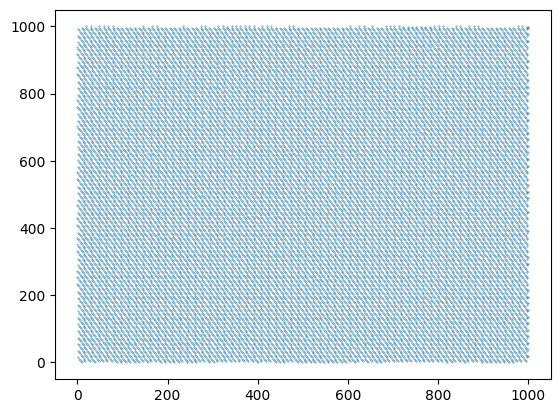

In [3]:
x, y, z = ics.pos.T
zslice = (z > 100) & (z < 102)
plt.scatter(x[zslice][::10], y[zslice][::10], s=0.1)

# read snapshot

In [4]:
snap = Q.Nbody('/Users/hahnchanghoon/data/simbig/quijote/fiducial/1', z=0.5)

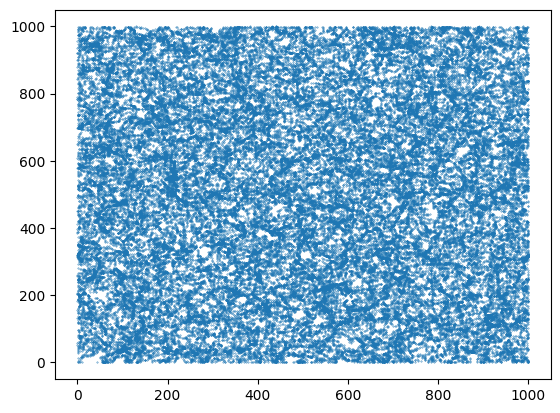

In [5]:
x, y, z = snap.pos.T
zslice = (z > 100) & (z < 101)
plt.scatter(x[zslice], y[zslice], s=0.1)

# read halos

In [6]:
halos = Q.Halos('/Users/hahnchanghoon/data/simbig/quijote/fiducial/1', z=0.5)

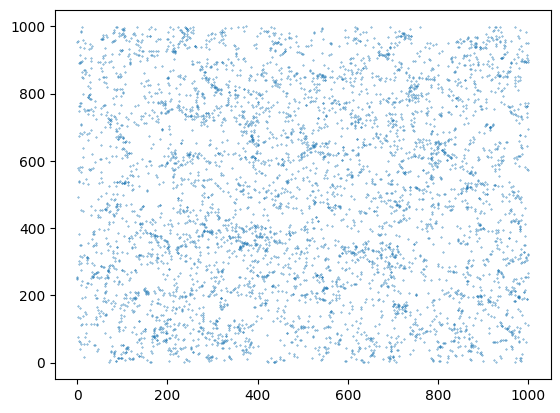

In [7]:
x, y, z = np.array(halos['Position']).T
zslice = (z > 100) & (z < 200)
plt.scatter(x[zslice], y[zslice], s=0.1)

# make HOD

In [10]:
# arbitrary HOD parameters
theta_hod = {
    'logMmin': 13.,
    'sigma_logM': 0.2,
    'logM0': 13.5,
    'logM1': 14.,
    'alpha': 0.7,
    'Abias': 0, 
    'eta_conc': 1.,
    'eta_cen': 0., 
    'eta_sat': 1.}

In [11]:
hod = Q.HODgalaxies(theta_hod, '/Users/hahnchanghoon/data/simbig/quijote/fiducial/1', z=0.5)

/opt/homebrew/Caskroom/miniconda/base/envs/simbig/lib/python3.11/site-packages/halotools/empirical_models/phase_space_models/analytic_models/satellites/nfw/biased_nfw_phase_space.py:225: UserWarning: You have selected 18 bins to digitize host halo concentration 
and 96 bins to digitize the galaxy bias parameter.
To populate mocks, the BiasedNFWPhaseSpace class builds a lookup table with shape (18, 96, 101),
one entry for every numerical solution to the Jeans equation.
Using this fine of a binning requires a long pre-computation of 174528 integrals
.Make sure you actually need to use so many bins
  warn(lookup_table_performance_warning.format(*args))
/opt/homebrew/Caskroom/miniconda/base/envs/simbig/lib/python3.11/site-packages/halotools/empirical_models/factories/hod_model_factory.py:890: UserWarning: The composite model received multiple component models 
with a new_haloprop_func_dict that use the conc_NFWmodel key. 
Ignoring the one that appears in the profile component for satellite

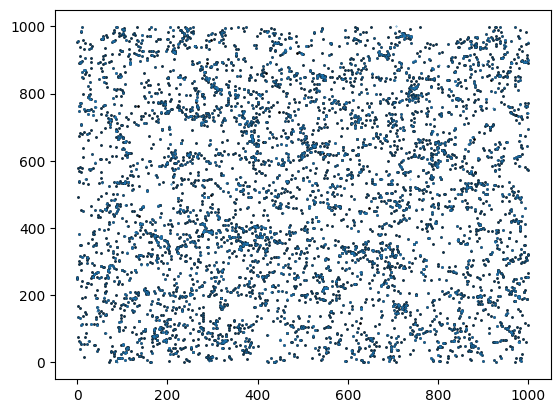

In [12]:
x0, y0, z0 = np.array(hod['Position']).T
zslice0 = (z0 > 100) & (z0 < 200)
plt.scatter(x[zslice], y[zslice], s=1, c='k')
plt.scatter(x0[zslice0], y0[zslice0], s=0.1)


(0.0, 100.0)

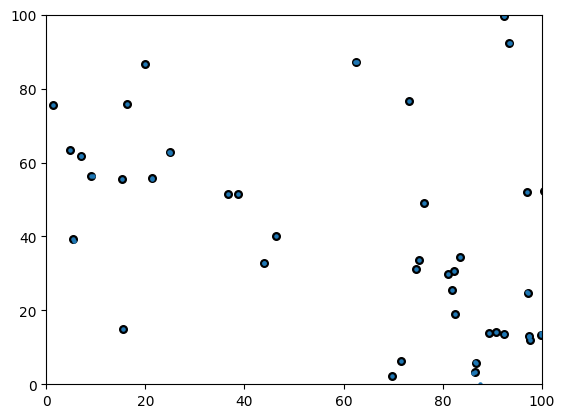

In [13]:
x0, y0, z0 = np.array(hod['Position']).T
zslice0 = (z0 > 100) & (z0 < 200)
plt.scatter(x[zslice], y[zslice], s=30, c='k')
plt.scatter(x0[zslice0], y0[zslice0], s=5)
plt.xlim(0., 100)
plt.ylim(0., 100)